## Предсказание биологического ответа молекул по их характеристикам
В представленных данных в первой колонке записано, была или нет реакция, все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д.
Необходимо сделать модель, которая предсказывала бы наличие реакции исходя из свойств молекулы.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import warnings
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

### Прочитаем исходные данные

In [2]:
data= pd.read_csv('gbm-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.isnull().sum().sum()

0

In [5]:
data[data.duplicated()]

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776


### В нашем распоряжении таблица с данными по 3751 молекуле с 1776 характеристиками. В данных отсутствуют пропуски и дубликаты.

### Разделим данные на целевую функцию и признаки

In [6]:
X=data.drop(['Activity'],axis=1)
y=data.Activity

### Разобъем выборку на обучающую и тестовую

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

### Обучим GradientBoostingClassifier для learning_rate из интервала [1, 0.5, 0.3, 0.2, 0.1] и построим графики значений log-loss на обучающей и тестовой выборках.

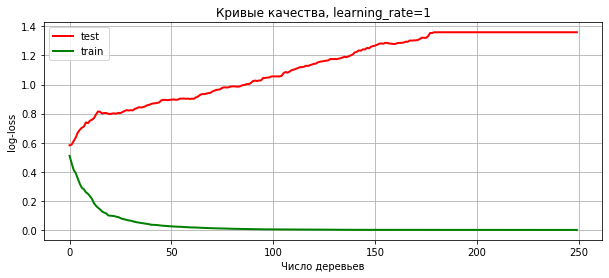

Для learning_rate= 1 минимальное значение метрики 0.58 достигается при 0 деревьях


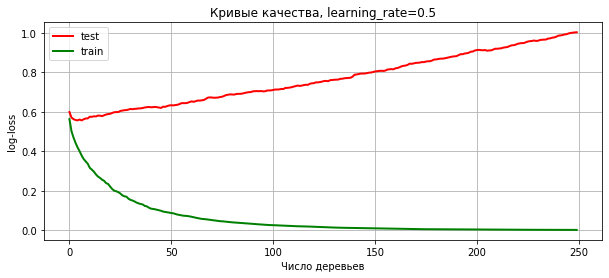

Для learning_rate= 0.5 минимальное значение метрики 0.56 достигается при 6 деревьях


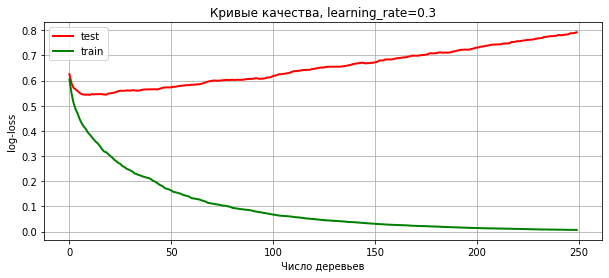

Для learning_rate= 0.3 минимальное значение метрики 0.54 достигается при 10 деревьях


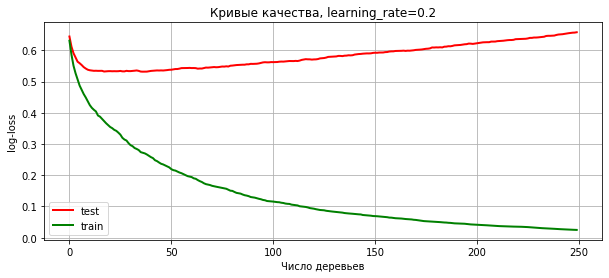

Для learning_rate= 0.2 минимальное значение метрики 0.53 достигается при 36 деревьях


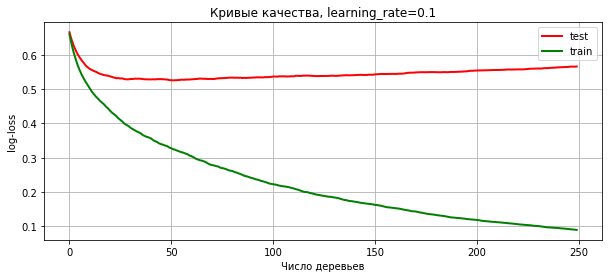

Для learning_rate= 0.1 минимальное значение метрики 0.53 достигается при 51 деревьях


In [8]:
list=[1, 0.5, 0.3, 0.2, 0.1]
for i in list:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241,learning_rate=i)
    clf.fit(X_train.to_numpy(), y_train)
    list_test=[]
    list_train=[]
    for i2, y_pred in enumerate(clf.staged_decision_function(X_test)):
        list_test.append(1/(1+np.exp(-y_pred)))        
    for i3, y_pred in enumerate(clf.staged_decision_function(X_train)):
        list_train.append(1/(1+np.exp(-y_pred)) ) 
    test_loss=[]
    train_loss=[]
    for i4 in range(0,250)  :        
        test_loss.append(log_loss(y_test,list_test[i4]))
        train_loss.append(log_loss(y_train,list_train[i4]))
    plt.figure(figsize=(10,4))
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title('Кривые качества, learning_rate='+str(i))
    plt.xlabel('Число деревьев')
    plt.ylabel('log-loss')
    plt.grid()
    plt.show()
    minn=1
    num=0
    for el in test_loss:
        if el<minn:
            minn=el
            num=test_loss.index(el)
    print('Для learning_rate=',i ,'минимальное значение метрики',np.round(minn,2),'достигается при',num,'деревьях')

### На всех графиках видно, что начиная с определенного момента (количества деревьев), модели склонны к переобучению. Лучшее значение метрики 0,53 при минимальном числе деревьев 36 показала модель с  learning_rate= 0.2.

### Обучим RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=36,random_state=241)
clf.fit(X_train, y_train)
list_test=clf.predict_proba(X_test)
list_train=clf.predict_proba(X_train)   
test_loss=np.round(log_loss(y_test,list_test),2)
train_loss=np.round(log_loss(y_train,list_train),2)
print('Значение log_loss на трейне',train_loss)
print('Значение log_loss на тесте',test_loss)

Значение log_loss на трейне 0.16
Значение log_loss на тесте 0.54


### Градиентный бустинг показал результат лучший, чем случайный лес благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. 